# Regressão Logística

## Resumo dos resultados dessa etapa

O modelo de regressão logística foi ajustado aos dados.

Após refinamento dos hiperparâmetros, a acurácia média atingida por esse modelo foi de 73%.

## Breve explicação e referências sobre o método

Em inglês:
* A [página do Scikit Learn sobre regressões logísticas](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) é uma excelente fonte para compreender o método.

## Detalhamento da etapa

### Imports

In [24]:
import requests
from io import BytesIO
import joblib
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

from random import choice, seed

import lime
import lime.lime_tabular

import eli5
import shap
shap.initjs()

In [22]:
def load_remote_joblib(url):
    """função utilizada para carregar joblib de fonte remota
    ESSAfeature_namesCAO É PERIGOSA
    a função joblib.load pode executar código arbitrário durante sua execuççao
    não utilize essa parte do código se você não tiver certeza do que está fazendo
    """
    content = requests.get(url).content
    return joblib.load(BytesIO(content))
    

x_scaler = load_remote_joblib("https://github.com/feliciov/agro_online/raw/main/nbs/data_gini/x_scaler.joblib")
scaled_X = load_remote_joblib("https://github.com/feliciov/agro_online/raw/main/nbs/data_gini/scaled_X.joblib")

y_scaler = load_remote_joblib("https://github.com/feliciov/agro_online/raw/main/nbs/data_gini/y_scaler.joblib")
scaled_y = load_remote_joblib("https://github.com/feliciov/agro_online/raw/main/nbs/data_gini/scaled_y.joblib")

feature_names = load_remote_joblib("https://github.com/feliciov/agro_online/raw/main/nbs/data_gini/features.joblib")
categories = load_remote_joblib("https://github.com/feliciov/agro_online/raw/main/nbs/data_gini/categories.joblib")

### Tunning

In [5]:
lreg = LogisticRegression(solver='saga')

In [6]:
lreg_params = {
    'max_iter':np.arange(50, 450, 50),
    'fit_intercept':[True, False],
    'random_state':[42]
}

In [7]:
lreg_gs = GridSearchCV(lreg, lreg_params, verbose=1)

In [8]:
lreg_gs.fit(scaled_X, scaled_y.ravel())

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=LogisticRegression(solver='saga'),
             param_grid={'fit_intercept': [True, False],
                         'max_iter': array([ 50, 100, 150, 200, 250, 300, 350, 400]),
                         'random_state': [42]},
             verbose=1)

## Modelo

In [9]:
lreg_model = lreg_gs.best_estimator_

In [10]:
lreg_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 50,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## Performance

In [11]:
lreg_model.score(scaled_X, scaled_y)

0.7339928057553957

In [12]:
print(classification_report(
    scaled_y,
    lreg_model.predict(scaled_X),
    target_names=categories
))

              precision    recall  f1-score   support

   gini_alto       0.75      0.71      0.73      2779
  gini_baixo       0.72      0.76      0.74      2781

    accuracy                           0.73      5560
   macro avg       0.73      0.73      0.73      5560
weighted avg       0.73      0.73      0.73      5560



In [13]:
joblib.dump(lreg_model, 'data_gini/lreg_model.joblib')

['data_gini/lreg_model.joblib']

## Interpretabilidade

Sorteio de uma observação para ser utilizada nos algorítimos de interpretabilidade

In [25]:
seed(42)

random_obs_idx = choice(range(len(scaled_X)))

In [26]:
random_obs = scaled_X[random_obs_idx]

### ELI5

In [23]:
eli5.show_weights(lreg_model, feature_names=feature_names)

In [28]:
eli5.explain_prediction_sklearn(lreg_model, random_obs,feature_names=feature_names)

Explanation(estimator="LogisticRegression(max_iter=50, random_state=42, solver='saga')", description=None, error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=0.0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='Estabelecimento Agropecuário (N)', weight=1.3942985689547072, std=None, value=0.212739545348747), FeatureWeight(feature='<BIAS>', weight=0.8631587885307871, std=None, value=1.0), FeatureWeight(feature='Atividade-Lavoura Temporária (%)', weight=0.7177139915253956, std=None, value=0.45258899999999996), FeatureWeight(feature='Atividade-Pesca(%)', weight=0.6282308938992145, std=None, value=0.3131479604188101), FeatureWeight(feature='Agricultura familiar (%)', weight=0.41093065077814966, std=None, value=0.884756), FeatureWeight(feature='Aves-Corte (%)', weight=0.20010298596579934, std=None, value=0.18482158664400541), FeatureWeight(feature='Área lavoura/ Trator(ha)', weight=0.11611606669203797, std=None, value=0.0547546573780609), FeatureWeight(feature='Aves-Ovos(%)', weight=0.0976958470738225, std=None, value=0.3228215002440744), FeatureWeight(feature='Área lavoura/ Adubadeira (ha)', weight=0.0733822321568317, std=None, value=0.07784887220707483), FeatureWeight(feature='Rendimento-Arroz (kg/ha)', weight=0.06464302339714367, std=None, value=0.14166666666666666), FeatureWeight(feature='Uso de irrigação (%)', weight=0.05089076202295868, std=None, value=0.185766), FeatureWeight(feature='Uso das terras-Pastagem (%)', weight=0.03663342820100046, std=None, value=0.49576040250063347), FeatureWeight(feature='Despesa com Agrotóxicos (%)', weight=0.03258539307212155, std=None, value=0.010314338355147341), FeatureWeight(feature='Área lavoura/ Semeadeira(ha)', weight=0.026300431577649486, std=None, value=0.08698540437670874), FeatureWeight(feature='Área média (ha)', weight=0.016512457155846604, std=None, value=0.007785414838646778), FeatureWeight(feature='Pessoal Ocupado / Estabelecimento (Pessoa)', weight=0.012259630512619775, std=None, value=0.01993800254985801), FeatureWeight(feature='Carga de Bovinos (n/ha)', weight=0.0004879281222868954, std=None, value=0.0011430760026614629), FeatureWeight(feature='Rendimento-Cacau(kg/ha)', weight=0.00015294662797661827, std=None, value=0.0008910328947368423)], neg=[FeatureWeight(feature='Produtor com escolaridade até Ensino Fundamental(%)', weight=-0.7249752050273138, std=None, value=0.63895), FeatureWeight(feature='Assistência Técnica (%)', weight=-0.1828498720465218, std=None, value=0.0977389), FeatureWeight(feature='Bovinos-Leite(%)', weight=-0.13778670562092954, std=None, value=0.1603336981211458), FeatureWeight(feature='Utilização de Agrotóxicos (%)', weight=-0.12032165671748186, std=None, value=0.19671500000000003), FeatureWeight(feature='Rendimento-Mandioca (kg/ha)', weight=-0.09787473237208276, std=None, value=0.22518133333333334), FeatureWeight(feature='Bovinos-Corte (%)', weight=-0.08915581668046312, std=None, value=0.157549), FeatureWeight(feature='Atividade-Produção Florestal(%)', weight=-0.08617404134366154, std=None, value=0.08816538148676917), FeatureWeight(feature='Uso das terras-Lavoura(%)', weight=-0.07671398508414833, std=None, value=0.05240028614352984), FeatureWeight(feature='Atividade-Pecuária(%)', weight=-0.058575530984363564, std=None, value=0.296499), FeatureWeight(feature='Rendimento-Milho (kg/ha)', weight=-0.04832710695178789, std=None, value=0.09081464968152865), FeatureWeight(feature='Rendimento-Cana (kg/ha)', weight=-0.01984730185058409, std=None, value=0.014194350000000001), FeatureWeight(feature='Rendimento-Laranja(kg/ha)', weight=-0.01505412428516775, std=None, value=0.017484), FeatureWeight(feature='Atividade-Lavoura Permanente(%)', weight=-0.010529525496248963, std=None, value=0.0616338), FeatureWeight(feature='Atividade-Horticultura&Floricultura(%)', weight=-0.007841131153672028, std=None, value=0.0207877), FeatureWeight(feature='Rendimento-Café(kg/ha)', weight=-0.004746684842985078, std=None, value=0.0138888888

### LIME

In [30]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=scaled_X,
    feature_names=feature_names,
    class_names=categories,
    mode='classification'
)

lime_exp_rl = explainer.explain_instance(
    random_obs,
    lreg_model.predict_proba,
)

In [31]:
lime_exp_rl.show_in_notebook()

### SHAP

In [32]:
shap_rl_expainer = shap.KernelExplainer(
    lreg_model.predict_proba,
    shap.sample(scaled_X, random_state=42)
)

In [33]:
shap_rl_values = shap_rl_expainer.shap_values(shap.sample(scaled_X, random_state=42))

  0%|          | 0/100 [00:00<?, ?it/s]

In [35]:
shap.force_plot(
    shap_rl_expainer.expected_value[0],
    shap_rl_values[0],
    feature_names=feature_names
)

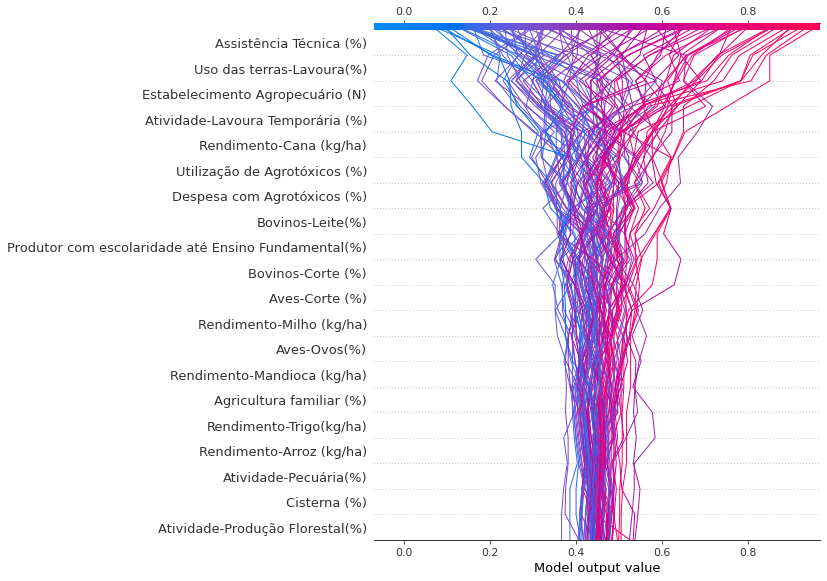

In [36]:
shap.decision_plot(
    shap_rl_expainer.expected_value[0],
    shap_rl_values[0],
    feature_names=feature_names
)

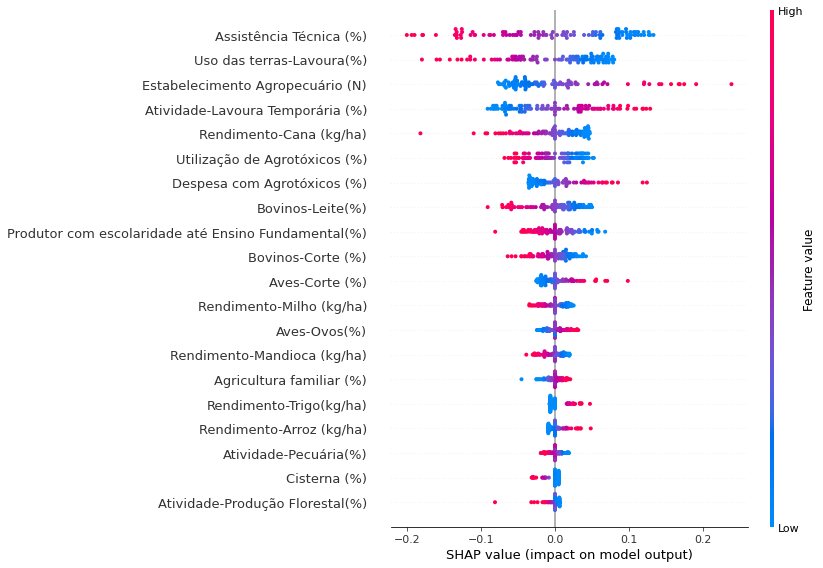

In [37]:
shap.summary_plot(
    shap_rl_values[0],
    features=shap.sample(scaled_X, random_state=42),
    feature_names=feature_names
)